In [38]:
from astroquery.gaia import Gaia
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse


In [39]:
# cluster_ra = 56.751 * u.degree
# cluster_dec = 24.1167 * u.degree
# radius = 3 * u.degree # arcmin to degrees

In [40]:
pleiades_data = pd.read_csv("Pleiades.csv")
gaia = pd.read_csv("GAIA.csv")
variable = pd.read_csv("variable.csv")

In [41]:
# gaia_query = Gaia.query_object_async(coordinate=SkyCoord(ra=cluster_ra, dec=cluster_dec,
#                                                          frame='icrs'), radius=radius)

# # Step 3: Identifying stars with high cluster membership probability
# # Extract Gaia DR3 data 
# gaia_data = gaia_query

# # # Extract coordinates (α, δ)
# coords = SkyCoord(ra=gaia_data['ra'], dec=gaia_data['dec'], unit=(u.deg, u.deg), frame='icrs')

# pmra_pmdec_corr = gaia_data['pmra_pmdec_corr']
# gaia_selected_indices = np.where(pmra_pmdec_corr >= 0.4)[0]
# # Calculate average proper motion and parallax for selected stars
# selected_pm_ra_cosdec = gaia_data['pmra'][gaia_selected_indices] *np.cos(np.radians(coords.dec[gaia_selected_indices]))
# selected_pm_dec = gaia_data['pmdec'][gaia_selected_indices]
# selected_parallax = gaia_data['parallax'][gaia_selected_indices]

# selected_avg_pm_ra_cosdec = np.mean(selected_pm_ra_cosdec)
# selected_avg_pm_dec = np.mean(selected_pm_dec)
# selected_avg_parallax = np.mean(selected_parallax)

# print(selected_avg_pm_ra_cosdec,selected_avg_pm_dec,selected_avg_parallax)

In [42]:
# Assuming we have membership probability data from previous analysis
# Filter stars with membership probability > 70% 

PMemb = pleiades_data["PMemb"]  
selected_indices = np.where(PMemb >= 0.7)[0]
source_pm_ra_cosdec = pleiades_data["pmRA"][selected_indices]
source_pm_dec = pleiades_data["pmDE"][selected_indices]
source_parallax = pleiades_data["plx"][selected_indices]
source_pAMa = pleiades_data["PMemb"][selected_indices]
selected_data = pleiades_data.loc[selected_indices, ["Source", "pmRA", "pmDE", "plx", "PMemb"]]

selected_data = selected_data
table_data = pd.DataFrame({
    "Source": selected_data["Source"],
    "Proper Motion RA": selected_data["pmRA"],
    "Proper Motion DE": selected_data["pmDE"],
    "Parallax": selected_data["plx"],
    "Membership Probability": selected_data["PMemb"]
})


In [43]:
avg_pm_ra_cosdec = np.mean(source_pm_ra_cosdec)
avg_pm_dec = np.mean(source_pm_dec)
avg_parallax = np.mean(source_parallax)
print(avg_pm_ra_cosdec, avg_pm_dec, avg_parallax)

20.008882978723403 -45.34851063829788 7.308825531914894


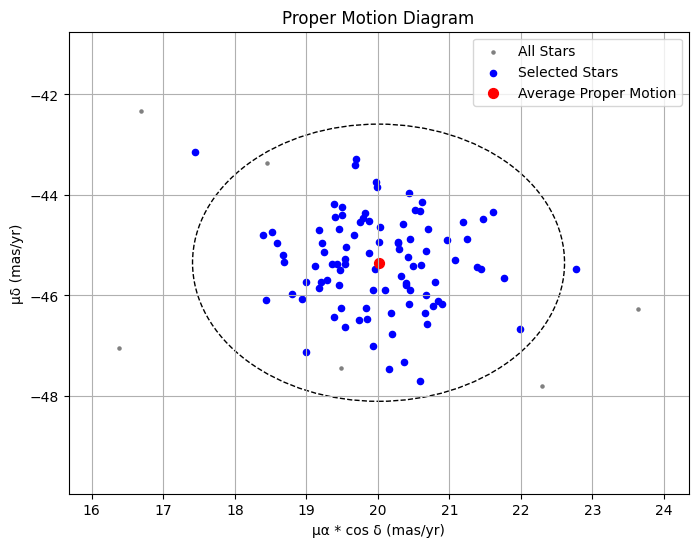

In [44]:
std_pm_ra_cosdec = np.std(source_pm_ra_cosdec)
std_pm_dec = np.std(source_pm_dec)

plt.figure(figsize=(8, 6))
plt.scatter(pleiades_data['pmRA'], pleiades_data['pmDE'], s=5, color='gray', label='All Stars')
plt.scatter(pleiades_data['pmRA'][selected_indices], pleiades_data['pmDE'][selected_indices],
            s=20, color='blue', label='Selected Stars')

plt.scatter(avg_pm_ra_cosdec,avg_pm_dec, s=50, color='red', label='Average Proper Motion')

in_ellipse_indices = np.where(((pleiades_data['pmRA'] - avg_pm_ra_cosdec) / std_pm_ra_cosdec)**2 +
                               ((pleiades_data['pmDE'] - avg_pm_dec) / std_pm_dec)**2 <= 1)[0]

ellipse = Ellipse(xy=(avg_pm_ra_cosdec, avg_pm_dec), width=3*std_pm_ra_cosdec*2, height=3*std_pm_dec*2,
                  edgecolor='black', facecolor='none', linestyle='--')

plt.gca().add_patch(ellipse)

plt.xlim(avg_pm_ra_cosdec - 5*std_pm_ra_cosdec, avg_pm_ra_cosdec + 5*std_pm_ra_cosdec)
plt.ylim(avg_pm_dec - 5*std_pm_dec, avg_pm_dec + 5*std_pm_dec)

plt.xlabel('µα * cos δ (mas/yr)')
plt.ylabel('µδ (mas/yr)')
plt.title('Proper Motion Diagram')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
# # Calculate standard deviations
# std_pm_ra_cosdec = np.std(source_pm_ra_cosdec)
# std_pm_dec = np.std(source_pm_dec)

# # Plot proper motion diagram
# plt.figure(figsize=(8, 6))
# plt.scatter(gaia['pmRA'], gaia['pmDE'], s=5, color='gray', label='All Stars')
# plt.scatter(pleiades_data['pmRA'][selected_indices], pleiades_data['pmDE'][selected_indices],
#             s=2, color='blue', label='Selected Stars')

# plt.scatter(avg_pm_ra_cosdec,avg_pm_dec, s=30, color='red', label='Average Proper Motion')

# in_ellipse_indices = np.where(((pleiades_data['pmRA'] - avg_pm_ra_cosdec) / std_pm_ra_cosdec)**2 +
#                                ((pleiades_data['pmDE'] - avg_pm_dec) / std_pm_dec)**2 <= 1)[0]

# ellipse = Ellipse(xy=(avg_pm_ra_cosdec, avg_pm_dec), width=3*std_pm_ra_cosdec*2, height=3*std_pm_dec*2,
#                   edgecolor='black', facecolor='none', linestyle='--')
# plt.gca().add_patch(ellipse)

# plt.xlabel('µα * cos δ (mas/yr)')
# plt.ylabel('µδ (mas/yr)')
# plt.title('Proper Motion Diagram')
# plt.legend()
# plt.grid(True)
# plt.show()

In [46]:
color_map = {
    'RRAB': 'yellow',
    'RRC': 'orange'
}

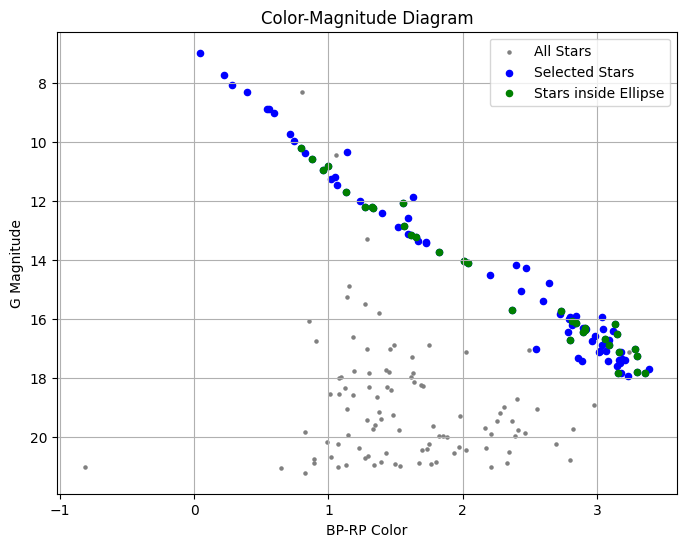

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(gaia['BP-RP'], gaia['Gmag'], s=5, color='gray', label='All Stars')
plt.scatter(pleiades_data['BP-RP'][selected_indices], pleiades_data['Gmag'][selected_indices],
            s=20, color='blue', label='Selected Stars')
plt.scatter(pleiades_data['BP-RP'][in_ellipse_indices], pleiades_data['Gmag'][in_ellipse_indices],
            s=20, color='green', label='Stars inside Ellipse')
plt.xlabel('BP-RP Color')
plt.ylabel('G Magnitude')
plt.title('Color-Magnitude Diagram')
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True)
plt.show()

In [48]:
# for var_class, color in color_map.items():
#     var_indices = np.where(variable['best_classification'] == var_class)[0]
#     plt.scatter(variable['_RAJ'][var_indices], variable['_DEJ'][var_indices],
#                 s=20, color=color, label=f'{var_class}')